<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/latihan_Text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('indonesian')
except LookupError:
    nltk.download('stopwords')


# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/anmedsos/sentiment_analysis/refs/heads/main/Sentiment_Rupiah/sentimen_rupiah.csv'

# Load the CSV into a pandas DataFrame
try:
    df = pd.read_csv(csv_url)
    print("Data loaded successfully.")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data loaded successfully.


,ID,sentiment,date,name,tweet,location
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur"
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia"


Using column 'tweet' for text data.


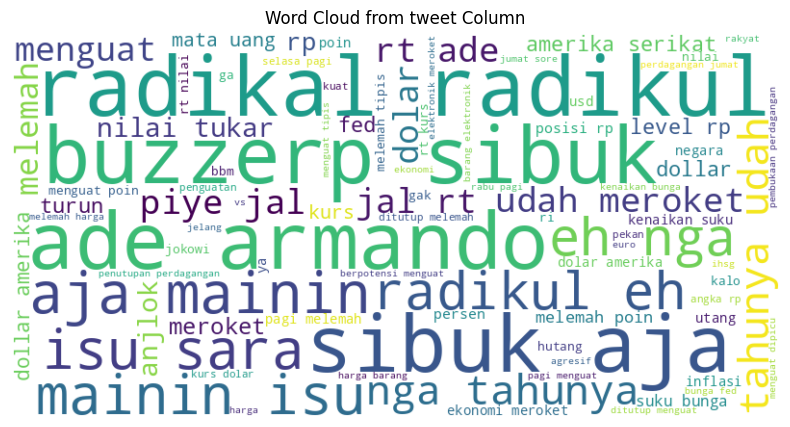

In [ ]:
# Identify the text column
text_column = None
possible_text_columns = ['tweet']

for col in possible_text_columns:
    if col in df.columns:
        text_column = col
        break

if text_column is None:
    print("Could not find a suitable text column. Please specify the column name containing the text data.")
else:
    print(f"Using column '{text_column}' for text data.")
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].dropna().astype(str))

    # Text preprocessing function
    def preprocess_text(text):
        text = text.lower() # Convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
        text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
        text = re.sub(r'#\w+', '', text) # Remove hashtags
        text = re.sub(r'[\d]+', '', text) # Remove numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters
        return text

    cleaned_text = preprocess_text(all_text)

    # Get Indonesian stop words
    indonesian_stopwords = stopwords.words('indonesian')

    # Add common English stop words as well, if needed, or other domain-specific words
    custom_stopwords = set(STOPWORDS) # English stopwords
    custom_stopwords.update(indonesian_stopwords)
    custom_stopwords.update(['rupiah', 'indonesia', 'nya', 'yg', 'ini', 'itu', 'di', 'dan', 'yang', 'dengan'])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        min_font_size=10
    ).generate(cleaned_text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud from {text_column} Column')
    plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def preprocess_for_classification(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[\d]+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters

    tokens = word_tokenize(text) # Tokenize text
    # Remove stopwords (using the custom_stopwords defined previously)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet_text'] = df[text_column].dropna().apply(preprocess_for_classification)

print("Text preprocessing completed and 'cleaned_tweet_text' column created.")

Text preprocessing completed and 'cleaned_tweet_text' column created.


In [ ]:
df

,ID,sentiment,date,name,tweet,location,cleaned_tweet_text
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur",anjlok jelang pengumuman kebijakan moneter fed
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia,anjlok jelang pengumuman kebijakan moneter fed
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN,dibanggakan anjlok krismon
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN,dikala anjlok rbdollar
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia",inggrisekonomi ambruk nilai poundsterling jatu...
...,...,...,...,...,...,...,...
991,1.590000e+18,negative,Thu Oct 27 19:07:21 +0000 2022,izulmyname,@worksfess Putus. Dunia mau masuk resesi ekono...,Jakarta,putus dunia masuk resesi ekonomi global anjlok...
992,1.590000e+18,negative,Thu Oct 27 12:25:48 +0000 2022,andra_dp3,"@legislatweet ""Astaghfirullah, dzolim sekali p...","DKI Jakarta, Indonesia",astaghfirullah dzolim pemerintah kena azab mel...
993,1.590000e+18,negative,Thu Oct 27 07:43:14 +0000 2022,REZIM_404,"@CNNIndonesia Rupiah anjlok, Dolar meroket.. A...",NaN,anjlok dolar meroket jgn hibur rakyat dgn kebo...
994,1.590000e+18,negative,Thu Oct 27 05:28:42 +0000 2022,cnbcindonesia,"Duh Rupiah, Kurs Dolar Australia Meroket 6% Da...",Jakarta Capital Region,duh kurs dolar australia meroket pekan


In [8]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

print("Sentiment labels encoded and 'sentiment_encoded' column created.")
display(df.head())

Sentiment labels encoded and 'sentiment_encoded' column created.


,ID,sentiment,date,name,tweet,location,cleaned_tweet_text,sentiment_encoded
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur",anjlok jelang pengumuman kebijakan moneter fed,0
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia,anjlok jelang pengumuman kebijakan moneter fed,0
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN,dibanggakan anjlok krismon,0
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN,dikala anjlok rbdollar,0
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia",inggrisekonomi ambruk nilai poundsterling jatu...,0


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed data into training and testing sets to evaluate the model's performance on unseen data.


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['cleaned_tweet_text']
y = df['sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (796,)
X_test shape: (200,)
y_train shape: (796,)
y_test shape: (200,)


## Train a Classification Model

### Subtask:
Select and train a suitable classification model (e.g., Naive Bayes, Logistic Regression, SVM) using the training data.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for efficiency

# Fit the vectorizer on X_train and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text data converted to TF-IDF feature vectors.")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully.")

Text data converted to TF-IDF feature vectors.
X_train_tfidf shape: (796, 1528)
X_test_tfidf shape: (200, 1528)
Logistic Regression model trained successfully.


## Evaluate the Model

### Subtask:
Evaluate the trained model's performance using metrics such as accuracy, precision, recall, and F1-score on the test data. Display a classification report and confusion matrix.


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       155
           1       0.90      0.82      0.86        45

    accuracy                           0.94       200
   macro avg       0.93      0.90      0.91       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[151   4]
 [  8  37]]


In [12]:
new_text = "harapan saya rupiah kembali menguat"

# Preprocess the new text
cleaned_new_text = preprocess_for_classification(new_text)

# Transform the cleaned text using the fitted TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

# Make a prediction using the trained model
prediction = logistic_model.predict(X_new_tfidf)

# Decode the prediction back to the original sentiment label
predicted_sentiment = label_encoder.inverse_transform(prediction)

print(f"Original text: '{new_text}'")
print(f"Cleaned text: '{cleaned_new_text}'")
print(f"Predicted sentiment: {predicted_sentiment[0]}")

Original text: 'harapan saya rupiah kembali menguat'
Cleaned text: 'harapan menguat'
Predicted sentiment: positive
